The Poisson equation is similar to the Laplace equation, except with a source term.

$$ \frac{\delta ^2 p }{\delta x^2} \frac{\delta ^2 p}{\delta y^2} = b$$

This is discretised and rearranged similarly to the Laplace equation:

$$ \frac{p_{i+1,j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i,j-1}^n}{\Delta y^2} = b_{i,j}^n $$


$$ p_{i,j}^n = \frac{\Delta x^2 (p_{i,j+1} + p_{i,j-1}) + \Delta y^2 (p_{i+1,j} + p_{i-1,j}) -b_{i,j}^n \Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}$$

The defined conditions (initial, boundary, source) are defined as follows:

p = 0 everywhere

p = 0 always at boundaries

b = 100 at i=1/4 nx, j = 1/4 ny

b = -100 at i=3/4 nx, j = 3/4 ny

In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Parameters
nx = 50
ny = 50
steps  = 100

#Grid size
xmin = 0
xmax = 2
ymin = 0
ymax = 1

#Difference between x and y coordinates
dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# Initialisation
p  = np.zeros((ny, nx)) #Defined as 0 everywhere initially
b  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)

# Source term as defined in initial conditions
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

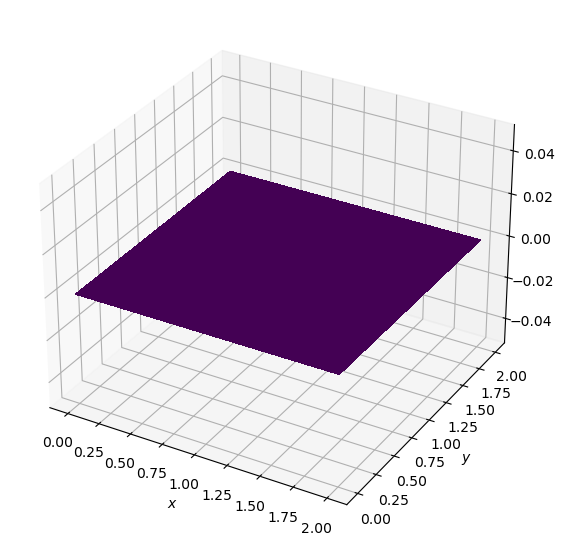

In [3]:
#Define plotting function
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

#Plot initial conditions
plot2D(x,y,p)

In [4]:
#Update function

def update(p, dx, dy, b):
    pnext = p.copy()
    
    #Update equation
    pnext[1:-1, 1:-1] = (dx**2 * (p[2:, 1:-1] + p[0:-2, 1:-1]) + 
                         dy**2 * (p[1:-1, 2:] + p[1:-1, 0:-2]) - 
                         (b[1:-1, 1:-1] * dx**2 * dy**2)) / (2*(dx*dx + dy*dy))
    
    #Update boundary conditions
    pnext[:, 0] = 0
    pnext[-1, :] = 0
    pnext[0, :] = 0
    pnext[-1, :] = 0
    
    return pnext

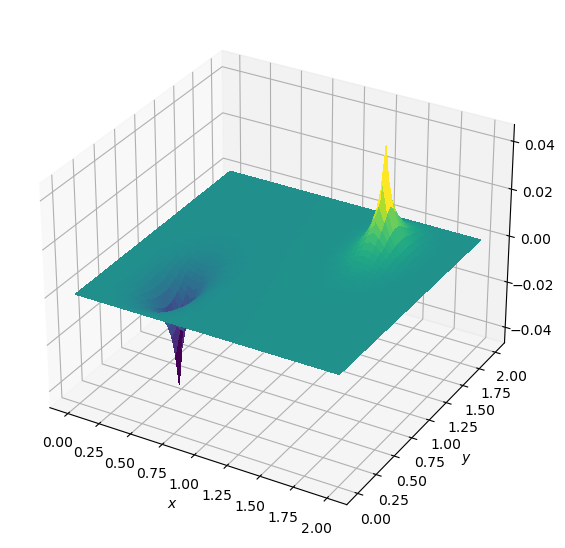

In [5]:
for i in range(steps):
    p = update(p, dx, dy, b)
    
plot2D(x, y, p)